# Installing and Importing Libraries 

In [ ]:
# !pip install pyfeats
# !pip install mahotas
# !pip install hypopt

In [ ]:
import cv2
import os  # needed navigate the system to get the input data
import numpy as np
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from warnings import filterwarnings
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import save
from numpy import load  # load numpy array from npy file
from sklearn.preprocessing import OrdinalEncoder
import pyfeats
from hypopt import GridSearch
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from mahotas import features
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# Data Preparation

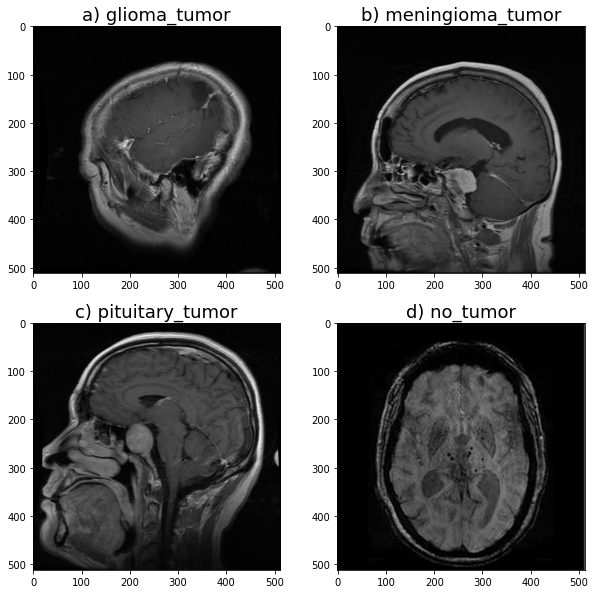

In [ ]:
folderPath = os.path.join("drive/MyDrive/dataset/", "image")
images = ['IMAGE_0003.jpg', 'IMAGE_0000.jpg', 'IMAGE_0009.jpg', 'IMAGE_0001.jpg']
labels = ['a) glioma_tumor', 'b) meningioma_tumor', 'c) pituitary_tumor', 'd) no_tumor']

fig = plt.figure(figsize=(10,10))
for i in range(4):
    img = cv2.imread(os.path.join(folderPath, images[i]))
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow(img)
    ax.set_title(labels[i], size=18)
plt.savefig("dataset_examples.jpg", dpi=150)
plt.show()

In [ ]:
# Task A
labels_task_A = ['no_tumor','tumor']

# Task B
# labels_task_B = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
# Load images - X
X = []
image_size = 256

folderPath = os.path.join("drive/MyDrive/dataset/", "image")
images = os.listdir(folderPath)

def last_4chars(x):
    return(x[-8:-4])

for image in sorted(images, key = last_4chars):  
    img = cv2.imread(os.path.join(folderPath, image), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (image_size, image_size))
    X.append(img)

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(3000, 256, 256)

In [ ]:
# Create Task A label
# df = pd.read_csv("/dataset/label.csv")
# df.loc[df["label"]=="meningioma_tumor", "label"] = "tumor"
# df.loc[df["label"]=="glioma_tumor", "label"] = "tumor"
# df.loc[df["label"]=="pituitary_tumor", "label"] = "tumor"
# df.to_csv("drive/MyDrive/dataset/label_task_A.csv", index=False)

In [ ]:
# Load labels - y
# Task A
df = pd.read_csv("drive/MyDrive/dataset/label_task_A.csv")
y = df.label.to_list()

# Task B
# df_task_B = pd.read_csv("drive/MyDrive/dataset/label.csv")
# y_task_B = df_task_B.label.to_list()

In [ ]:
df['label'].value_counts()

tumor       2546
no_tumor     454
Name: label, dtype: int64

In [ ]:
df_task_B['label'].value_counts()

glioma_tumor        860
meningioma_tumor    855
pituitary_tumor     831
no_tumor            454
Name: label, dtype: int64

In [ ]:
# Task A
y = np.array(y)

# Task B
# y = np.array(y_task_B)

In [ ]:
y[:10]

array(['tumor', 'no_tumor', 'tumor', 'tumor', 'tumor', 'tumor',
       'no_tumor', 'tumor', 'tumor', 'tumor'], dtype='<U8')

In [ ]:
y.shape

(3000,)

# Feature Extraction 


*   Local Binary Pattern (LBP)
*   Grey Level Run Length Matrix (GLRLM)
*   Grey Level Difference Statistics (GLDS)
*   Zernike Moments (ZM)



In [ ]:
glds_features = []

for image in X:
  glds_features_image, glds_label = pyfeats.glds_features(image, None, Dx=[0,1,1,1], Dy=[1,1,0,-1])
  glds_features.append(glds_features_image)

In [ ]:
glds_features[0]

[ 2.72791313e+04  1.19930170e+07  6.11681712e+08 -5.53233757e+05
  3.97926000e+05]


In [ ]:
glds_features = np.asarray(glds_features)
glds_features.shape

(3000, 5)

In [ ]:
# Save feature
save("glds_features.npy", glds_features)

In [ ]:
glrlm_features = []

for image in X:
  glrlm_features_image, glrlm_label = pyfeats.glrlm_features(image, None, Ng=256)
  glrlm_features.append(glrlm_features_image)

In [ ]:
glrlm_features[0]

[8.85012293e-01 6.66569217e+00 6.83523615e+02 3.51930918e+04
 7.20818015e-01 8.04486089e+13 4.29987417e+03 8.04486089e+13
 4.09121935e+03 1.00000000e+00 5.41078249e+03]


In [ ]:
glrlm_features = np.asarray(glrlm_features)

In [ ]:
glrlm_features.shape

(3000, 11)

In [ ]:
# Save feature
save("glrlm_features.npy", glrlm_features)

In [ ]:
lbp_features = []

for image in X:
  lbp_features_image, lbp_label = pyfeats.lbp_features(image, None)
  lbp_features.append(lbp_features_image)

In [ ]:
lbp_features = np.asarray(lbp_features)

In [ ]:
lbp_features.shape

(3000, 6)

In [ ]:
# Save feature
save("lbp_features.npy", lbp_features)

In [ ]:
zernikes_moments_features = []

for image in X:
  zernikes_moments_features_image, zernikes_moments_label = pyfeats.zernikes_moments(image)
  zernikes_moments_features.append(zernikes_moments_features_image)

In [ ]:
zernikes_moments_features = np.asarray(zernikes_moments_features)

In [ ]:
zernikes_moments_features.shape

(3000, 25)

In [ ]:
# Save feature
save("zernikes_moments_features", zernikes_moments_features)

In [ ]:
# Load features
glds_features = load("glds_features.npy")
glrlm_features = load("glrlm_features.npy")
lbp_features = load("lbp_features.npy")
zernikes_moments_features = load("zernikes_moments_features.npy")

In [ ]:
print(glds_features.shape)
print(glrlm_features.shape)
print(lbp_features.shape)
print(zernikes_moments_features.shape)

(3000, 5)
(3000, 11)
(3000, 6)
(3000, 25)


In [ ]:
# Combine all four feature arrays
X = np.concatenate((glds_features, glrlm_features, lbp_features, zernikes_moments_features), axis=1)

In [ ]:
X.shape

(3000, 47)

In [ ]:
# Save features
save("features.npy", X)

# Training, Validation, and Test Sets Split

In [ ]:
# Create test and train sets from one dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)
# Create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) # 0.1 x 0.9 = 0.09

# Data Pre-processing

In [ ]:
# Normalize images
X_train = np.array(X_train, dtype="float") / 255.0
X_val = np.array(X_val, dtype="float") / 255.0
X_test = np.array(X_test, dtype="float") / 255.0

Task A: Performing One Hot Encoding on the labels after converting it into numerical values

In [ ]:
# Task A
y_train_new = []
for i in y_train:
    y_train_new.append(labels_task_A.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_val_new = []
for i in y_val:
    y_val_new.append(labels_task_A.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

y_test_new = []
for i in y_test:
    y_test_new.append(labels_task_A.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Task B: Performing Ordinal Encoding on the labels

In [ ]:
# Task B
y_train_new = []
for i in y_train:
    y_train_new.append(labels_task_B.index(i))
y_train = y_train_new

y_val_new = []
for i in y_val:
    y_val_new.append(labels_task_B.index(i))
y_val = y_val_new

y_test_new = []
for i in y_test:
    y_test_new.append(labels_task_B.index(i))
y_test = y_test_new

# Classification and Evaluation

In [ ]:
# Metric results display functions for Task A and B
def display_metric_results_A(training_labels, training_predictions, val_labels, val_predictions, test_labels, test_predictions):
    print(f"{'Training Set Accuracy Score:':<31}{accuracy_score(training_labels, training_predictions):>10.4f}")
    print(f"{'Validation Set Accuracy Score:':<31}{accuracy_score(val_labels, val_predictions):>10.4f}")
    print(f"{'Validation Set Precision Score:':<31}{precision_score(val_labels, val_predictions):>10.4f}")
    print(f"{'Validation Set Recall Score:':<31}{recall_score(val_labels, val_predictions):>10.4f}")
    print(f"{'Validation Set F1 Score:':<31}{f1_score(val_labels, val_predictions):>10.4f}")
    print(f"{'Test Set Accuracy Score:':<31}{accuracy_score(test_labels, test_predictions):>10.4f}")
    print(f"{'Test Set Precision Score:':<31}{precision_score(test_labels, test_predictions):>10.4f}")
    print(f"{'Test Set Recall Score:':<31}{recall_score(test_labels, test_predictions):>10.4f}")
    print(f"{'Test Set F1 Score:':<31}{f1_score(test_labels, test_predictions):>10.4f}")

def display_metric_results_B(training_labels, training_predictions, val_labels, val_predictions, test_labels, test_predictions):
    print(f"{'Training Set Accuracy Score:':<31}{accuracy_score(training_labels, training_predictions):>10.4f}")
    print(f"{'Validation Set Accuracy Score:':<31}{accuracy_score(val_labels, val_predictions):>10.4f}")
    print(f"{'Validation Set Precision Score:':<31}{precision_score(val_labels, val_predictions, average='micro'):>10.4f}")
    print(f"{'Validation Set Recall Score:':<31}{recall_score(val_labels, val_predictions, average='micro'):>10.4f}")
    print(f"{'Validation Set F1 Score:':<31}{f1_score(val_labels, val_predictions, average='micro'):>10.4f}")
    print(f"{'Test Set Accuracy Score:':<31}{accuracy_score(test_labels, test_predictions):>10.4f}")
    print(f"{'Test Set Precision Score:':<31}{precision_score(test_labels, test_predictions, average='micro'):>10.4f}")
    print(f"{'Test Set Recall Score:':<31}{recall_score(test_labels, test_predictions, average='micro'):>10.4f}")
    print(f"{'Test Set F1 Score:':<31}{f1_score(test_labels, test_predictions, average='micro'):>10.4f}")

In [ ]:
# SVM-RBF Classification Model
def img_SVM(training_images, training_labels, val_images, val_labels, test_images, test_labels):
    print("Fitting the classifier to the training set")

    param_grid = {'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,5e1,1e2,5e2,1e3,5000],
                  'gamma': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4], } 

    gs = GridSearch(model=svm.SVC(kernel='rbf', class_weight='balanced'), param_grid=param_grid)
    clf = gs.fit(training_images, training_labels, val_images, val_labels)

    print("Best estimator found by grid search:")
    print(clf) # equivalent to print(gs.best_estimator_)

    training_pred = clf.predict(training_images) # equavalent to gs.best_estimator_.predict(training_images)
    val_pred = clf.predict(val_images)
    test_pred = clf.predict(test_images)
    display_metric_results_A(training_labels, training_pred, val_labels, val_pred, test_labels, test_pred)
    # display_metric_results_B(training_labels, training_pred, val_labels, val_pred, test_labels, test_pred)
    return test_pred

In [ ]:
# Task A
img_SVM(X_train, y_train[:,0], X_val, y_val[:,0], X_test, y_test[:,0])

# Task B
# img_SVM(X_train, y_train, X_val, y_val, X_test, y_test)

Fitting the classifier to the training set


100%|██████████| 84/84 [00:25<00:00,  3.23it/s]


Best estimator found by grid search:
SVC(C=5, class_weight='balanced', gamma=1e-09, random_state=0)
Training Set Accuracy Score:       0.9288
Validation Set Accuracy Score:     0.2926
Validation Set Precision Score:    0.2926
Validation Set Recall Score:       0.2926
Validation Set F1 Score:           0.2926
Test Set Accuracy Score:           0.2833
Test Set Precision Score:          0.2833
Test Set Recall Score:             0.2833
Test Set F1 Score:                 0.2833


array([3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 3, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# KNN Classification Model
def img_KNN(training_images, training_labels, val_images, val_labels, test_images, test_labels):
    #Create KNN object with a K coefficient
    param_grid = {'n_neighbors': list(range(1,50)),
                  'leaf_size': list(range(1,50)),
                  'p': [1,2]}
    gs = GridSearch(model=KNeighborsClassifier(), param_grid=param_grid)
    # Train the model using the training sets
    neigh = gs.fit(training_images, training_labels, val_images, val_labels) # Fit KNN model
    print("Best estimator found by grid search:")
    print(neigh)
    training_pred = neigh.predict(training_images)
    val_pred = neigh.predict(val_images)
    test_pred = neigh.predict(test_images)
    display_metric_results_A(training_labels, training_pred, val_labels, val_pred, test_labels, test_pred)
    # display_metric_results_B(training_labels, training_pred, val_labels, val_pred, test_labels, test_pred)
    return test_pred

In [ ]:
# Task A
img_KNN(X_train, y_train[:,0], X_val, y_val[:,0], X_test, y_test[:,0])

# Task B
# img_KNN(X_train, y_train, X_val, y_val, X_test, y_test)

100%|██████████| 4802/4802 [02:02<00:00, 39.16it/s]


Best estimator found by grid search:
KNeighborsClassifier(leaf_size=1, n_neighbors=41, p=1)
Training Set Accuracy Score:       0.3477
Validation Set Accuracy Score:     0.3370
Validation Set Precision Score:    0.3370
Validation Set Recall Score:       0.3370
Validation Set F1 Score:           0.3370
Test Set Accuracy Score:           0.2867
Test Set Precision Score:          0.2867
Test Set Recall Score:             0.2867
Test Set F1 Score:                 0.2867


array([0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 0, 3, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0,
       3, 0, 2, 3, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 2, 2, 3, 2, 0, 2, 0, 3, 0, 0, 0, 2, 3, 0, 2, 2, 2, 2, 0, 3,
       0, 2, 0, 3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       3, 0, 0, 2, 0, 3, 2, 0, 0, 2, 3, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 3, 0, 0, 3, 0, 3, 2, 0, 2, 0, 0, 2, 3, 2, 3, 2, 2, 2,
       3, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 0, 2, 3, 3, 0, 0, 3, 0, 3, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 3, 0, 3,
       2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 3, 3,
       0, 3, 2, 2, 3, 2, 0, 2, 0, 0, 1, 2, 3, 2, 2, 3, 2, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 3, 2, 0, 3, 0, 0, 0, 2, 2, 3, 2, 0, 3, 0, 0,
       3, 0, 2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 0, 0])

# Plotting Learning Curves

In [ ]:
"""
========================
Plotting Learning Curves
========================
In the first column, first row the learning curve of a naive Bayes classifier
is shown for the digits dataset. Note that the training score and the
cross-validation score are both not very good at the end. However, the shape
of the curve can be found in more complex datasets very often: the training
score is very high at the beginning and decreases and the cross-validation
score is very low at the beginning and increases. In the second column, first
row we see the learning curve of an SVM with RBF kernel. We can see clearly
that the training score is still around the maximum and the validation score
could be increased with more training samples. The plots in the second row
show the times required by the models to train with various sizes of training
dataset. The plots in the third row show how much time was required to train
the models for each training sizes.
"""
#print(__doc__)

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """


    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend()
    plt.savefig('lc_task_A_SVM.jpg', dpi=150)
    return plt

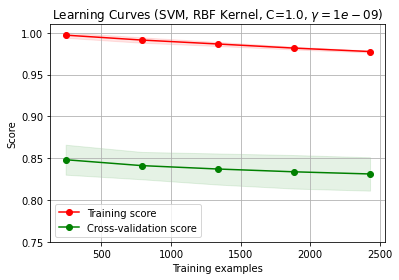

In [ ]:
fig, axes = plt.subplots(1, 1)
title = r"Learning Curves (SVM, RBF Kernel, C=1.0, $\gamma=1e-09$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = svm.SVC(kernel='rbf', C=1, gamma=1e-9)
plot_learning_curve(estimator, title, np.concatenate((X_train, X_val)), np.concatenate((y_train[:,0], y_val[:,0])), axes=1, ylim=(0.75, 1.01),
                       cv=cv, n_jobs=4)
plt.show()